In [1]:
# Import the basic packages
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np

In [2]:
# import the dataset
with open('Winp.csv', 'rb') as f:
    enc = chardet.detect(f.read())  
mydata = pd.read_csv('Winp.csv', encoding = enc['encoding'])
mydata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,24-May-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,03-Nov-11,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,17-Sep-12,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,11-Apr-12,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,17-Nov-11,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [3]:
#making a copy of the data to avoid playing with the new data:
df = mydata.copy()
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,01-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,03-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
#Data Preprocessing 
# 1. Missing Value
# 2. Outier
# 3. Encoding

In [5]:
df['Deal Date'] = pd.to_datetime(df['Deal Date'])

In [6]:
#Checking the type of data with Dependent and Independet variables
df.info()
#Most of the data is object except for the Deal Cost everything else is a character
#There is missing data with 'Client Category', since less than 25% of the values are missing we cannot delete the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [7]:
#Verifying the missing value
df.isnull().any()
#Client category is the only missing data

Client Category      True
Solution Type       False
Deal Date           False
Sector              False
Location            False
VP Name             False
Manager Name        False
Deal Cost           False
Deal Status Code    False
dtype: bool

In [8]:
#Calculating the number of missing values
df.isnull().sum()
#79 missing values is extremely less

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

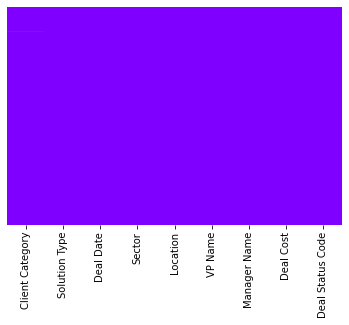

In [9]:
#Visualization of the missing values using a Heat Map
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='rainbow')
plt.show()
#Missing data is with 'Client Category' as showing in the graph.

In [10]:
#Percentage of missing value
(df.isnull().sum() / len(df))*100

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

In [11]:
#Handling the missing data
Client_Category=df['Client Category'].value_counts()
Client_Category

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [12]:
#Since the missing value is 79 and 'others' have the most number of values, we can add 'Others' to the missing values
df['Client Category'] = df['Client Category'].fillna('Others')
# We use a function called 'Mode' because it gives us the maximum frequency orccurance. If we dont handle the missing data
# The algorithm wont work.

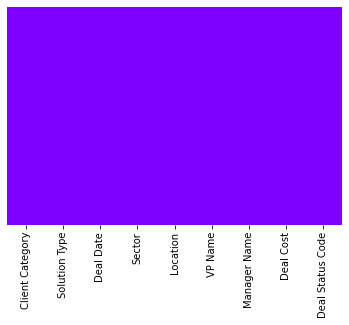

In [13]:
#Confirming if there are any missing values
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='rainbow')
plt.show()

In [14]:
# Summary Of Categorical Variable

In [15]:
sumcat = df.describe(include='O')
# 'O' because Object Catgegory

In [16]:
sumcat
#Observe no missing data
#This can help us with the analysing high frequency names

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [17]:
Client_Category_index = df['Client Category'].value_counts().index
Client_Category_index
#This is done to see which has the highest values in accending order

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

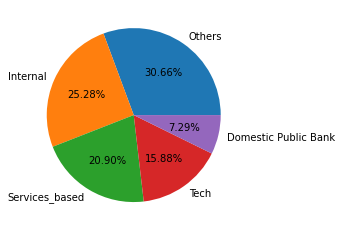

In [18]:
#Pie Chart of top 10 domains so that we can attribute more importance to them. Pie chart cant hold more than 10.
plt.pie(Client_Category[:5], labels=Client_Category_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

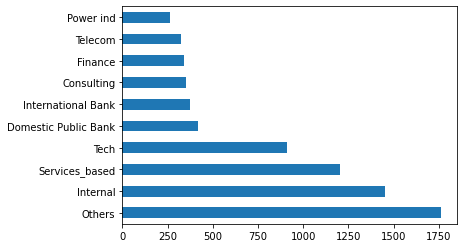

In [19]:
#Bar Graph of top 10
Client_Category[:10].plot(kind='barh')

In [20]:
#Analysing the solutions 
Solutions_Type = df['Solution Type'].value_counts()
Solutions_Type

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 60       1
Solution 57       1
Solution 56       1
Solution 18       1
Solution 19       1
Name: Solution Type, Length: 67, dtype: int64

In [21]:
Solutions_Type_index = df['Solution Type'].value_counts().index
Solutions_Type_index

Index(['Solution 32', 'Solution 9', 'Solution 10', 'Solution 39',
       'Solution 67', 'Solution 37', 'Solution 59', 'Solution 12',
       'Solution 8', 'Solution 29', 'Solution 6', 'Solution 13', 'Solution 31',
       'Solution 4', 'Solution 28', 'Solution 38', 'Solution 7', 'Solution 11',
       'Solution 20', 'Solution 52', 'Solution 40', 'Solution 30',
       'Solution 14', 'Solution 36', 'Solution 58', 'Solution 47',
       'Solution 35', 'Solution 55', 'Solution 33', 'Solution 48',
       'Solution 16', 'Solution 26', 'Solution 49', 'Solution 2',
       'Solution 34', 'Solution 42', 'Solution 61', 'Solution 41',
       'Solution 65', 'Solution 44', 'Solution 17', 'Solution 15',
       'Solution 50', 'Solution 25', 'Solution 1', 'Solution 43',
       'Solution 24', 'Solution 62', 'Solution 5', 'Solution 27',
       'Solution 46', 'Solution 3', 'Solution 22', 'Solution 53',
       'Solution 51', 'Solution 45', 'Solution 63', 'Solution 23',
       'Solution 54', 'Solution 21', 'Sol

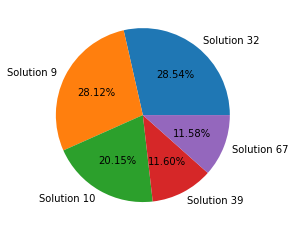

In [22]:
plt.pie(Solutions_Type[:5], labels=Solutions_Type_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

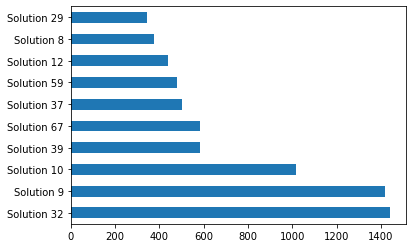

In [23]:
#Bar Graph
Solutions_Type[:10].plot(kind='barh')

In [24]:
#Sector count
Sector = df['Sector'].value_counts()
Sector

Sector 23    2693
Sector 2     1748
Sector 20     773
Sector 12     607
Sector 24     578
Sector 17     474
Sector 16     474
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      128
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [25]:
#Index Values
Sector_Index = df['Sector'].value_counts().index
Sector_Index

Index(['Sector 23', 'Sector 2', 'Sector 20', 'Sector 12', 'Sector 24',
       'Sector 17', 'Sector 16', 'Sector 15', 'Sector 9', 'Sector 25',
       'Sector 18', 'Sector 1', 'Sector 13', 'Sector 22', 'Sector 19',
       'Sector 3', 'Sector 4', 'Sector 11', 'Sector 14', 'Sector 6',
       'Sector 5', 'Sector 8', 'Sector 21', 'Sector 7', 'Sector 10'],
      dtype='object')

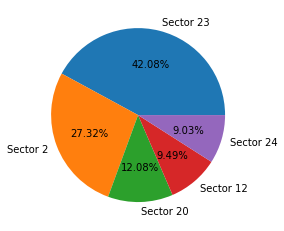

In [26]:
#Pie chart
plt.pie(Sector[:5], labels=Sector_Index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

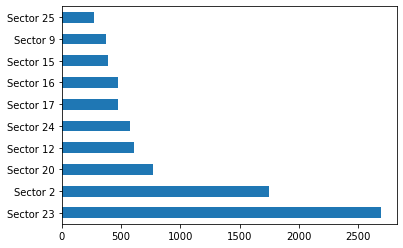

In [27]:
#Bar Graph
Sector[:10].plot(kind='barh')

In [28]:
#Location
Location = df['Location'].value_counts()
Location

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [29]:
#Index Values
Location_Index = df['Location'].value_counts().index
Location_Index

Index(['L10', 'L5', 'L1', 'Others', 'L3', 'L11', 'L12', 'L9', 'L7', 'L4', 'L6',
       'L8', 'L2'],
      dtype='object')

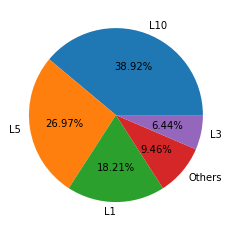

In [30]:
#Pie chart
plt.pie(Location[:5], labels=Location_Index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

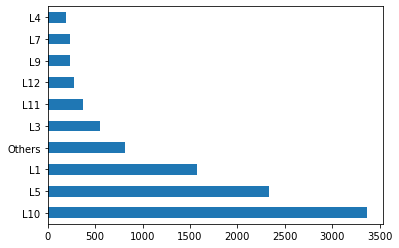

In [31]:
#Bar Graph
Location[:10].plot(kind='barh')

In [32]:
#Vice President
VP_Name = df['VP Name'].value_counts()
VP_Name

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [33]:
#Index Values
VP_Name_Index = df['VP Name'].value_counts().index
VP_Name_Index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Visvajeet Das',
       'Waylon Mulder', 'P. Somya', 'Kirk Hofmeister', 'Sarthak Batra',
       'md. afsar'],
      dtype='object')

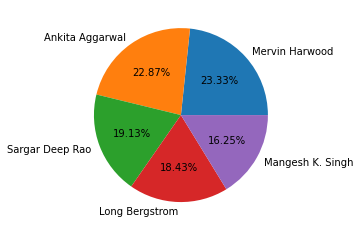

In [34]:
#Pie chart
plt.pie(VP_Name[:5], labels=VP_Name_Index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

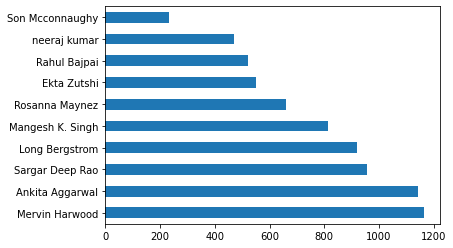

In [35]:
#Bar Graph
VP_Name[:10].plot(kind='barh')

In [36]:
#Manager 
Manager_Type = df['Manager Name'].value_counts()
Manager_Type

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Anju Nanda           1
Taran Singh          1
pooran chand         1
Rishab Bhatt         1
Cleotilde Biron      1
Name: Manager Name, Length: 278, dtype: int64

In [37]:
Manager_Index = df['Manager Name'].value_counts().index
Manager_Index

Index(['Molly Eakes', 'Rudraksh Sharma', 'Desmond Krout', 'Gayle Molter',
       'Manpreet Singh', 'Rosana Yokum', 'Rayford Durgan', 'Manish Saundriyal',
       'Jewell Tunstall', 'Hardeep Suksma',
       ...
       'Palmer Holmberg', 'Heath Mullarkey', 'Sultan Khan', 'Aastha Gandhi',
       'Anish Jonson', 'Anju Nanda', 'Taran Singh', 'pooran chand',
       'Rishab Bhatt', 'Cleotilde Biron'],
      dtype='object', length=278)

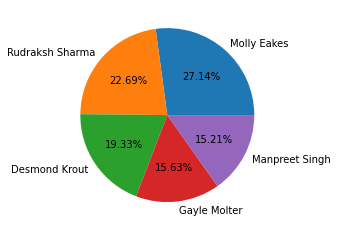

In [38]:
#Pie chart
plt.pie(Manager_Type[:5], labels=Manager_Index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

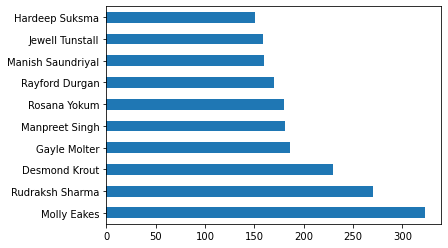

In [39]:
#Bar Graph
Manager_Type[:10].plot(kind='barh')

In [40]:
#Deal Status Codes
Deal_Status_Code = df['Deal Status Code'].value_counts()
Deal_Status_Code
#Balanced set

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [41]:
#Index Values
Deal_Index = df['Deal Status Code'].value_counts().index
Deal_Index

Index(['Lost', 'Won'], dtype='object')

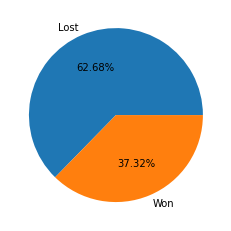

In [42]:
#Pie chart
plt.pie(Deal_Status_Code[:5], labels=Deal_Index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

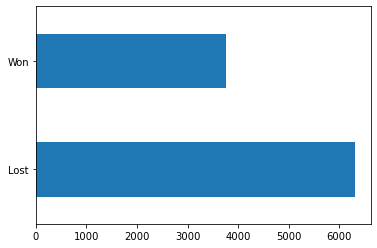

In [43]:
#Bar Graph
Deal_Status_Code[:10].plot(kind='barh')

In [44]:
#Checking the relation b/w different variables

In [45]:
#Relation b/w client category and Deal status code
rel_client_cat = df[['Client Category',
                     'Deal Status Code']].groupby(['Client Category',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [46]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status Count
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [47]:
#Relation b/w Solution type and Deal Status Code
rel_Solution_type = df[['Solution Type',
                     'Deal Status Code']].groupby(['Solution Type',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Solution Type Count'})

In [48]:
rel_Solution_type

,Solution Type,Deal Status Code,Solution Type Count
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [49]:
#Relation b/w Sector and Deal Status Code
rel_sector = df[['Sector',
                     'Deal Status Code']].groupby(['Sector',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Solution Type Count'})

In [50]:
rel_sector

,Sector,Deal Status Code,Solution Type Count
0,Sector 1,Lost,158
1,Sector 1,Won,73
2,Sector 10,Lost,2
3,Sector 10,Won,1
4,Sector 11,Lost,86
5,Sector 11,Won,28
6,Sector 12,Lost,406
7,Sector 12,Won,201
8,Sector 13,Lost,148
9,Sector 13,Won,37


In [51]:
#Relation b/w Location and Deal Status Code
rel_location = df[['Location',
                     'Deal Status Code']].groupby(['Location',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Solution Type Count'})

In [52]:
rel_location

,Location,Deal Status Code,Solution Type Count
0,L1,Lost,912
1,L1,Won,660
2,L10,Lost,2230
3,L10,Won,1130
4,L11,Lost,232
5,L11,Won,135
6,L12,Lost,178
7,L12,Won,98
8,L2,Lost,6
9,L2,Won,2


In [53]:
#Relation b/w VP Name and Deal Status Code
rel_vp = df[['VP Name',
                     'Deal Status Code']].groupby(['VP Name',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Solution Type Count'})

In [54]:
rel_vp 

,VP Name,Deal Status Code,Solution Type Count
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
...,...,...,...
77,md. afsar,Lost,2
78,neeraj kumar,Lost,254
79,neeraj kumar,Won,217
80,som dutt,Lost,138


In [55]:
#Relation b/w Manager Name and Deal Status Code
rel_manager = df[['Manager Name',
                     'Deal Status Code']].groupby(['Manager Name',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Solution Type Count'})

In [56]:
rel_manager

,Manager Name,Deal Status Code,Solution Type Count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [57]:
#Relationship b/w Client Category and Deal Status Code
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Client Category', values ='Deal Cost'))

Client Category        Airpline    Automobiles    Consulting  Consumer Good  \
Deal Status Code                                                              
Lost              482887.701818  706355.042679  6.088462e+05  629885.954898   
Won               549411.768000  537281.641061  1.528884e+06  859452.332644   

Client Category   Domestic Bank  Domestic Private Bank  Domestic Public Bank  \
Deal Status Code                                                               
Lost               1.495498e+06          881407.086023          1.070093e+06   
Won                1.919716e+06          688611.491860          5.993003e+05   

Client Category     Electronics        Energy        Energy   ...  \
Deal Status Code                                              ...   
Lost              553812.637407  1.557206e+06  694726.890714  ...   
Won               596633.987407  6.761059e+05  926633.987778  ...   

Client Category      Power ind    Real Estate  Research Development  \
Deal Status Co

In [58]:
#Relationship b/w VP Name and Deal Status Code
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'VP Name', values ='Deal Cost'))

VP Name              Alam Syed  Ankita Aggarwal  Brendon Wycoff  \
Deal Status Code                                                  
Lost              1.087144e+06     654206.63000    1.096894e+06   
Won               1.172937e+06     503528.35065    1.909288e+06   

VP Name            Clinton Mani    Dennis Faux  Earline Langton   Ekta Zutshi  \
Deal Status Code                                                                
Lost              776755.218548  554656.861667     1.189219e+06  7.912821e+05   
Won               600857.843500  315294.120000     6.034314e+05  1.021396e+06   

VP Name           Gaurav Sameria  Gayle Molter  Gopa Trilochana  ...  \
Deal Status Code                                                 ...   
Lost               554590.017879  7.291971e+05     1.464321e+06  ...   
Won                586433.823958  1.282863e+06     8.195701e+05  ...   

VP Name           Saurabh Singh  Son Mcconnaughy  Varsha Arora    Vidur Hukle  \
Deal Status Code                    

In [59]:
#Relationship b/w Manager and Deal Status Code
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Manager Name', values ='Deal Cost'))

Manager Name      Aastha Gandhi  Abhinav Warrier  Abhishek Singhal  \
Deal Status Code                                                     
Lost                        NaN    588808.824000     772860.963182   
Won                   242647.06    302235.296667     476956.522609   

Manager Name      Abhiskek Kumar   Abhiskhek  D    Abram Fines  Aditya Kumar  \
Deal Status Code                                                               
Lost               949894.957857  440767.973889  501764.706000     792647.06   
Won                587507.740789  375658.823600  714127.789655     250367.65   

Manager Name      Aditya Tondon   Ahdarsha Jha  Ahswini Saini  ...  \
Deal Status Code                                               ...   
Lost                 1058823.53  924866.311818     1029411.77  ...   
Won                         NaN  351102.940000      601470.59  ...   

Manager Name          shafibul  sharat chandran   sheak shakir  shiv kumar  \
Deal Status Code                       

In [60]:
#Relationship b/w Solution Type and Deal Status Code
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Solution Type', values ='Deal Cost'))

Solution Type     Solution 1    Solution 10   Solution 11    Solution 12  \
Deal Status Code                                                           
Lost               224117.65  676461.210986  1.543663e+06  825068.800058   
Won                150196.08  594538.975828  3.059717e+06  897737.095714   

Solution Type       Solution 13   Solution 14    Solution 15    Solution 16  \
Deal Status Code                                                              
Lost              826709.730748  1.018263e+06  889215.686667  608529.412222   
Won               702220.889286  5.171639e+05  347794.115000  650735.295000   

Solution Type      Solution 17  Solution 18  ...   Solution 61  Solution 62  \
Deal Status Code                             ...                              
Lost              1.029412e+06          NaN  ...  2.458824e+06  2794117.650   
Won               6.669118e+05     225000.0  ...  1.279816e+06  3708970.585   

Solution Type     Solution 63  Solution 64  Solution 65  Solu

In [61]:
#Introducing Year of the deal in the dataset
df['Deal_Date_year'] = df['Deal Date'].dt.year
df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011
...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,2019
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won,2019
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,2019
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won,2019


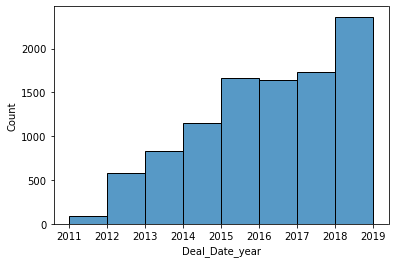

In [62]:
#Histogram for the year
sns.histplot(df.Deal_Date_year, bins = 8)
plt.show()

In [63]:
df['Deal_Date_month'] = df['Deal Date'].dt.month
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


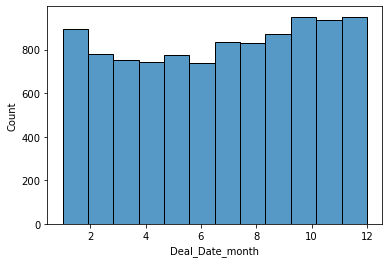

In [64]:
#Histogram for the month
sns.histplot(df.Deal_Date_month, bins = 12)
plt.show()

In [65]:
df['Deal_Date_quarter'] = df['Deal Date'].dt.quarter
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


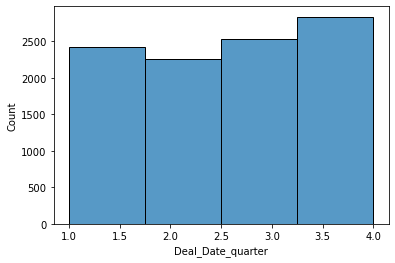

In [66]:
#Histogram for the quarter
sns.histplot(df.Deal_Date_quarter, bins = 4)
plt.show()

In [67]:
#Dropping the date column since other dates are separated
df = df.drop(['Deal Date'],axis = 1 )

In [68]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [69]:
#The next step is encoding. We have to convert everything to a number to use it in a model
df['Client Category'] = df['Client Category'].astype('category')
df['Client Category'] = df['Client Category'].cat.codes

df['Solution Type'] = df['Solution Type'].astype('category')
df['Solution Type'] = df['Solution Type'].cat.codes

df['Sector'] = df['Sector'].astype('category')
df['Sector'] = df['Sector'].cat.codes

df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

df['VP Name'] = df['VP Name'].astype('category')
df['VP Name'] = df['VP Name'].cat.codes

df['Manager Name'] = df['Manager Name'].astype('category')
df['Manager Name'] = df['Manager Name'].cat.codes

df['Deal Status Code'] = df['Deal Status Code'].astype('category')
df['Deal Status Code'] = df['Deal Status Code'].cat.codes

In [70]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


In [71]:
#Splitting into Independent and dependent 
x = df.drop(['Deal Status Code'],axis=1)
y = df['Deal Status Code']

In [72]:
x.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,2012,3,1
1,39,64,16,7,6,82,744705.88,2012,9,3
2,19,54,12,12,6,183,60000.00,2011,8,3
3,19,54,12,12,6,183,60000.00,2011,4,2
4,19,25,12,12,6,183,80882.35,2011,6,2


In [73]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Deal Status Code, dtype: int8

In [74]:
#Since we're not doing a Time Series Analysis, we are dropping the Date columns
x = x.iloc[:,0:7]

In [75]:
x.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
0,39,64,16,7,6,82,150000.00
1,39,64,16,7,6,82,744705.88
2,19,54,12,12,6,183,60000.00
3,19,54,12,12,6,183,60000.00
4,19,25,12,12,6,183,80882.35


In [76]:
#Standardizing the data - Deal Cost
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [77]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

In [78]:
#Splitting into training & testing data (75% Train & 25% Test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.75 , random_state=101)

In [79]:
# 1. Logestic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train , y_train)

LogisticRegression()

In [81]:
y_pred_log_test = logit.predict(x_test)
y_pred_log_train = logit.predict(x_train)

In [82]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [83]:
cm = confusion_matrix(y_test, y_pred_log_test)

print(' Test Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

 Test Confusion matrix

 [[1627    4]
 [ 883    2]]

True Positives(TP) =  1627

True Negatives(TN) =  2

False Positives(FP) =  4


In [84]:
from sklearn.metrics import accuracy_score

print('Test Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_log_test)))

Test Model accuracy score: 0.6475


In [85]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_log_train)))

Training-set accuracy score: 0.6196


<AxesSubplot:>

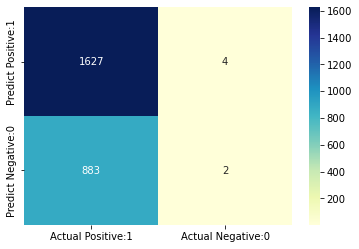

In [86]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [87]:
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      4675
           1       0.50      0.00      0.01      2870

    accuracy                           0.62      7545
   macro avg       0.56      0.50      0.39      7545
weighted avg       0.57      0.62      0.48      7545



In [88]:
print(classification_report(y_test,y_pred_log_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1631
           1       0.33      0.00      0.00       885

    accuracy                           0.65      2516
   macro avg       0.49      0.50      0.40      2516
weighted avg       0.54      0.65      0.51      2516



In [89]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [90]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6475


In [91]:
# Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3525


In [92]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9975


In [93]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6482


In [94]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6482


In [95]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.6667


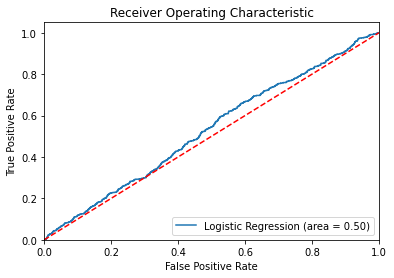

In [96]:
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logit.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [97]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_log_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.4999


In [98]:
#Cross Validation for Logistic Regression

In [99]:
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(logit,x_train,y_train, cv = 15)
accuracy_test = cross_val_score(logit,x_test,y_test,cv = 15)

In [100]:
#Training Data
print(accuracy_train)

[0.62027833 0.62027833 0.61829026 0.6222664  0.61829026 0.62027833
 0.61630219 0.62027833 0.62027833 0.62425447 0.62027833 0.61829026
 0.62027833 0.61829026 0.61431412]


In [101]:
print('Average cross-validation score: {:.4f}'.format(accuracy_train.mean()))

Average cross-validation score: 0.6195


In [102]:
#RANDOM FOREST MODEL

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [106]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_rf_train)))

Training-set accuracy score: 0.9966


In [107]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf_test)))

Training-set accuracy score: 0.8287


In [108]:
# check class distribution in test set

y_test.value_counts()

0    1631
1     885
Name: Deal Status Code, dtype: int64

In [109]:
cm = confusion_matrix(y_test, y_pred_rf_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

Confusion matrix

 [[1540   91]
 [ 340  545]]

True Positives(TP) =  1540

True Negatives(TN) =  545

False Positives(FP) =  91


<AxesSubplot:>

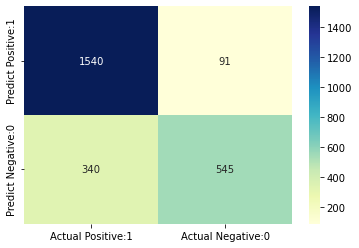

In [110]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1631
           1       0.86      0.62      0.72       885

    accuracy                           0.83      2516
   macro avg       0.84      0.78      0.80      2516
weighted avg       0.83      0.83      0.82      2516



In [112]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [113]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8287


In [114]:
# Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1713


In [115]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9442


In [116]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8191


In [117]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8569


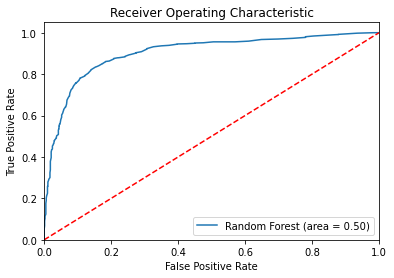

In [118]:
#Generating ROC AND AUC Score
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()

In [119]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_rf_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7800


In [120]:
#Cross Validation Method
from sklearn.model_selection import cross_val_score

accuracy_test_rf = cross_val_score(rf,x_test,y_test,cv = 20)

print(accuracy_test_rf)

[0.66666667 0.65079365 0.72222222 0.71428571 0.69047619 0.73015873
 0.72222222 0.66666667 0.76984127 0.73809524 0.79365079 0.73015873
 0.77777778 0.70634921 0.68253968 0.74603175 0.728      0.744
 0.76       0.808     ]


In [121]:
print('Average cross-validation score: {:.4f}'.format(accuracy_test_rf.mean()))

Average cross-validation score: 0.7274


In [122]:
#Navies Bayes Model

In [123]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [124]:
#Predicting the results
y_pred_test_gnb = gnb.predict(x_test)

y_pred_test_gnb

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [125]:
from sklearn.metrics import accuracy_score

print('Test Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_gnb)))

Test Model accuracy score: 0.6494


In [126]:
y_pred_train_gnb = gnb.predict(x_train)

y_pred_train_gnb

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [127]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gnb)))

Training-set accuracy score: 0.6186


In [128]:
# print the scores on training and test set
# Checking for Overfitting & Underfitting

print('Training set accuracy score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set accuracy score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set accuracy score: 0.6186
Test set accuracy score: 0.6494


In [129]:
#We can see that the occurences of most frequent class is 1631. 
#So, we can calculate null accuracy by dividing 885 by total number of occurences.
null_accuracy = (1631/(1631+885))

print(null_accuracy)

0.6482511923688394


In [130]:
#We can see that our model accuracy score is 0.6494 but null accuracy score is 0.6482.
#So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the 
#class labels.

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_gnb)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

Confusion matrix

 [[1603   28]
 [ 854   31]]

True Positives(TP) =  1603

True Negatives(TN) =  31

False Positives(FP) =  28


<AxesSubplot:>

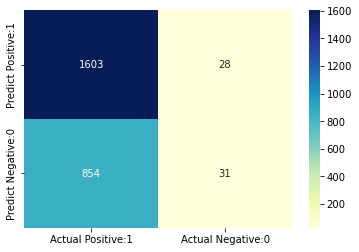

In [132]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [133]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_gnb))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1631
           1       0.53      0.04      0.07       885

    accuracy                           0.65      2516
   macro avg       0.59      0.51      0.42      2516
weighted avg       0.61      0.65      0.53      2516



In [134]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [135]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6494


In [136]:
# Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3506


In [137]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9828


In [138]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6524


In [139]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5254


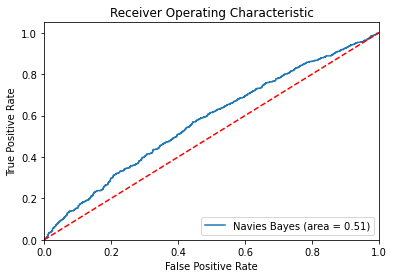

In [140]:
#Generating ROC AND AUC Score
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navies Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('gnb_ROC')
plt.show()

In [141]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test_gnb)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5089


In [142]:
#K Fold Cross Validation

In [143]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.61986755 0.61324503 0.62119205 0.61589404 0.61986755 0.62068966
 0.61538462 0.62334218 0.61671088 0.6193634 ]


In [144]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6186


In [145]:
#K Nearest Neighbour

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [147]:
# Fit the model
knn = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform', algorithm='auto')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [148]:
print('Training accuracy score: %.3f' % knn.score(x_train, y_train))
print('Test accuracy score: %.3f' % knn.score(x_test, y_test))

Training accuracy score: 0.782
Test accuracy score: 0.676


In [149]:
# Create the parameter grid
#
param_grid = [{
    'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}]
#

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [151]:
# Create a pipeline
#
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [152]:
# Create a grid search instance
#
gs = GridSearchCV(pipeline, param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

In [153]:
# Fit the most optimal model
#
gs.fit(x_train, y_train)
#
# Print the best model parameters and scores
#
print('Best Score: %.3f' % gs.best_score_, '\nBest Parameters: ', gs.best_params_)
#
# Print the model score for test data
#
print('Score: %.3f' % gs.score(x_test, y_test))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Score: 0.774 
Best Parameters:  {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Score: 0.816


In [170]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [155]:
y_knn_test = knn.predict(x_test)

y_knn_test

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

In [156]:
cm = confusion_matrix(y_test, y_knn_test)

print(' Test Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

 Test Confusion matrix

 [[1258  373]
 [ 443  442]]

True Positives(TP) =  1258

True Negatives(TN) =  442

False Positives(FP) =  373


<AxesSubplot:>

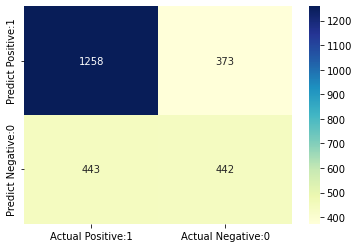

In [157]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_knn_test))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1631
           1       0.54      0.50      0.52       885

    accuracy                           0.68      2516
   macro avg       0.64      0.64      0.64      2516
weighted avg       0.67      0.68      0.67      2516



In [159]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [160]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6757


In [161]:
# Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3243


In [162]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7713


In [163]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7396


In [164]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.7396


In [165]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5423


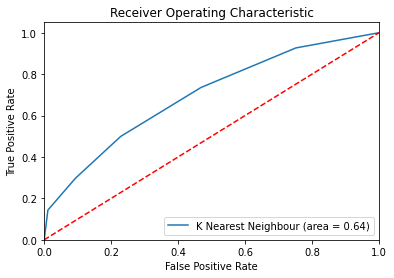

In [166]:
#Generating ROC AND AUC Score
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K Nearest Neighbour (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Knn_ROC')
plt.show()

In [167]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_knn_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6354


In [168]:
#XG BOOST MODEL

In [174]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier 

In [176]:
 
xgb_class = XGBClassifier()
xgb_class.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [177]:
y_pred_xgb_train = xgb_class.predict(x_train)
y_pred_xgb_test = xgb_class.predict(x_test)

In [178]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_xgb_train)))

Training-set accuracy score: 0.9271


In [180]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb_test)))

Training-set accuracy score: 0.7949


In [181]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

Confusion matrix

 [[1439  192]
 [ 324  561]]

True Positives(TP) =  1439

True Negatives(TN) =  561

False Positives(FP) =  192


<AxesSubplot:>

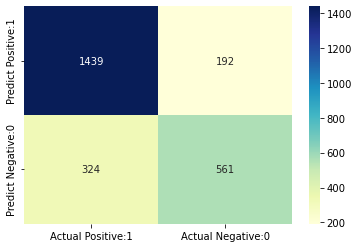

In [182]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [183]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1631
           1       0.75      0.63      0.68       885

    accuracy                           0.79      2516
   macro avg       0.78      0.76      0.77      2516
weighted avg       0.79      0.79      0.79      2516



In [184]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [185]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7949


In [186]:
# Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2051


In [187]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8823


In [188]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8162


In [189]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7450


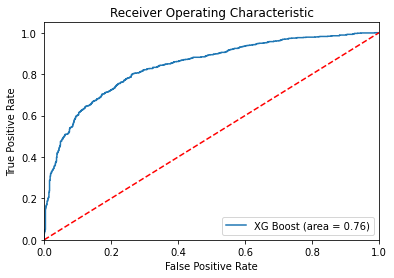

In [192]:
#Generating ROC AND AUC Score
#Generate AUC-ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(y_test, xgb_class.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_class.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

In [193]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_xgb_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7581


In [194]:
#K Fold Cross Validation

In [197]:
#Cross Validation Method
from sklearn.model_selection import cross_val_score

accuracy_test_rf = cross_val_score(xgb_class,x_test,y_test,cv = 20)

print(accuracy_test_rf)

[0.70634921 0.65873016 0.77777778 0.70634921 0.71428571 0.76984127
 0.6984127  0.69047619 0.77777778 0.71428571 0.83333333 0.73015873
 0.79365079 0.6984127  0.6984127  0.73809524 0.696      0.712
 0.712      0.768     ]
